In [1]:
!pip install nagisa
!pip install git+https://github.com/takapy0210/nlplot.git

     |████████████████████████████████| 21.5 MB 2.6 MB/s 
     |████████████████████████████████| 28.0 MB 19.4 MB/s 
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
  Cloning https://github.com/takapy0210/nlplot.git to /tmp/pip-req-build-givf7clg
  Running command git clone -q https://github.com/takapy0210/nlplot.git /tmp/pip-req-build-givf7clg
  Created wheel for nlplot: filename=nlplot-1.1.0-py3-none-any.whl size=967053 sha256=18488da84c856cbe80f2e55d9592628c0695966b4c5c062ae5d3c1fb1628cf3d
  Stored in directory: /tmp/pip-ephem-wheel-cache-fsex3ycj/wheels/95/8d/dd/883ea2dcc332095eb9897659e263bbad30368edf736715b425
Successfully built nlplot
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
import glob
import os

import nagisa
import nlplot
import pandas as pd

In [3]:
def extract_txt(filename: str) -> str:
    with open(filename) as text_file:
        # 0: URL, 1: timestamp
        text = text_file.readlines()[2:]
        text = [sentence.strip() for sentence in text]
        text = list(filter(lambda line: line != '', text))
        return ''.join(text)


EXTRACTDIR = '/kaggle/input/livedoor-news/'
categories = [
    name for name
    in os.listdir(os.path.join(EXTRACTDIR, "text"))
    if os.path.isdir(os.path.join(EXTRACTDIR, "text", name))]

categories = sorted(categories)
table = str.maketrans({
    '\n': '',
    '\t': '　',
    '\r': '',
})

all_text = []
all_label = []

for cat in categories:
    files = glob.glob(os.path.join(EXTRACTDIR, "text", cat, "{}*.txt".format(cat)))
    files = sorted(files)
    body = [extract_txt(elem).translate(table) for elem in files]
    label = [cat] * len(body)

    all_text.extend(body)
    all_label.extend(label)

df = pd.DataFrame({'text': all_text, 'label': all_label})

In [4]:
df.head()

,text,label
0,友人代表のスピーチ、独女はどうこなしている？もうすぐジューン・ブライドと呼ばれる６月。独女の...,dokujo-tsushin
1,ネットで断ち切れない元カレとの縁携帯電話が普及する以前、恋人への連絡ツールは一般電話が普通だ...,dokujo-tsushin
2,相次ぐ芸能人の“すっぴん”披露 その時、独女の心境は？「男性はやっぱり、女性の“すっぴん”が...,dokujo-tsushin
3,ムダな抵抗！？ 加齢の現実ヒップの加齢による変化は「たわむ→下がる→内に流れる」、バストは「...,dokujo-tsushin
4,税金を払うのは私たちなんですけど！6月から支給される子ども手当だが、当初は子ども一人当たり月...,dokujo-tsushin


In [5]:
df = df.loc[:10]
tagger = nagisa.Tagger()
df['sep_text'] = [tagger.extract(text, extract_postags=['名詞']).words for text in df['text']]

In [6]:
npt = nlplot.NLPlot(df, taget_col='sep_text')
stopwords = npt.get_stopword(top_n=5, min_freq=0)

In [7]:
# uni-gram
npt.bar_ngram(
    title='uni-gram',
    xaxis_label='word_count',
    yaxis_label='word',
    ngram=1,
    top_n=50,
    width=800,
    height=1100,
    stopwords=stopwords,
)

100%|██████████| 11/11 [00:00<00:00, 4164.77it/s]


In [8]:
# bi-gram
npt.bar_ngram(
    title='bi-gram',
    xaxis_label='word_count',
    yaxis_label='word',
    ngram=2,
    top_n=50,
    width=800,
    height=1100,
    stopwords=stopwords,
)

100%|██████████| 11/11 [00:00<00:00, 3840.30it/s]


In [9]:
npt.treemap(
    title='Tree Map',
    ngram=1,
    stopwords=stopwords,
)

100%|██████████| 11/11 [00:00<00:00, 4795.48it/s]


In [10]:
npt.word_distribution(
    title='number of words distribution'
)

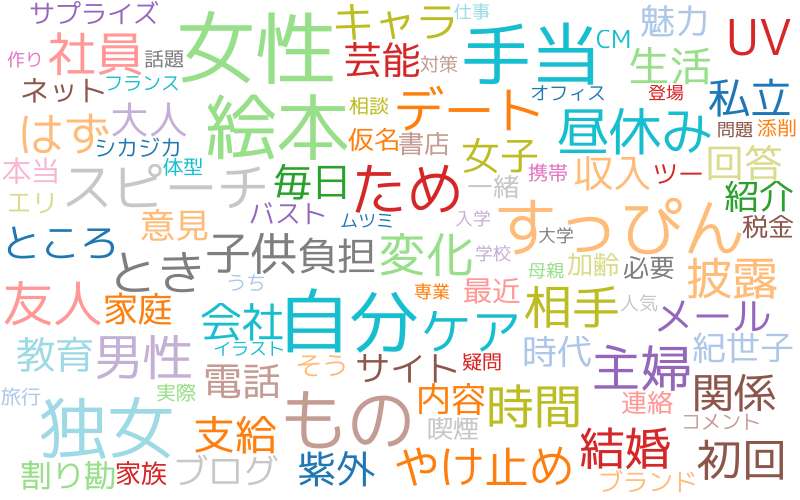

In [11]:
npt.wordcloud(
    stopwords=stopwords,
    colormap='tab20_r',
)

In [12]:
npt.build_graph(stopwords=stopwords, min_edge_frequency=5)
npt.co_network(
    title='Co-occurrence network',
    color_palette='hls',
    width=1000,
    height=1200,
)

node_size:15, edge_size:40


In [13]:
npt.sunburst(
    title='sunburst chart',
    colorscale=True,
    color_continuous_scale='Oryel',
    width=1000,
    height=800,
)

In [14]:
npt.ldavis(num_topics=3, passes=5, save=False)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.119577 -0.046463       1        1  38.870464
0     -0.104689 -0.069573       2        1  38.203274
1     -0.014888  0.116035       3        1  22.926262, topic_info=     Term       Freq      Total Category  logprob  loglift
164   子ども  27.000000  27.000000  Default  30.0000  30.0000
230  すっぴん  12.000000  12.000000  Default  29.0000  29.0000
632    絵本  17.000000  17.000000  Default  28.0000  28.0000
491    手当  17.000000  17.000000  Default  27.0000  27.0000
19   スピーチ   8.000000   8.000000  Default  26.0000  26.0000
..    ...        ...        ...      ...      ...      ...
210    相手   2.708237   7.633151   Topic3  -5.3731   0.4367
0       0   3.448418  26.869127   Topic3  -5.1315  -0.5802
271    女性   2.757838  21.652233   Topic3  -5.3549  -0.5878
227     2   2.191133  19.607550   Topic3  -5.5850  -0.7186
115     1   2.153723  15.914942   Topic3  -5.6022  -0.5272

[176 rows x 6 columns], token_table=      Topic      Freq Term
term                      
834       2  0.910517    %
0         1  0.595479    0
0         2  0.260522    0
0         3  0.111652    0
115       1  0.439838    1
...     ...       ...  ...
224       1  0.328241   関係
224       3  0.492361   関係
225       3  0.976167   電話
311       1  0.790060   魅力
311       3  0.197515   魅力

[187 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2])